# Data Sience using Python

## Mauricio Carvajal

In this notebook the idea is go trhu the framework on those to do data science with python,

For this the document is diviced in the following parts:

1- Loading libraries

2- Cleaning and Preprocessing of the data

3- EDA (Exploratory Data Analysis)

4- Feature Engineering

5> Model Develoment and Evaluation

# Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from matplotlib import pylab
from pylab import *

#PreProcesing
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#Clasification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Neural network
from sklearn.neural_network import MLPClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score


#cross validation
from sklearn.model_selection  import train_test_split
#It must relate to the renaming and deprecation of cross_validation sub-module to model_selection. 
#Try substituting cross_validation to model_selection

#PCA
from sklearn.decomposition import PCA
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 1 Cleaning and Pre-processing

This step is very important due to we do load the data, quick review about the integrity of the data, any transformation needed and then pre-processing before moving to .

## 1.1 Loading the data

In [2]:
#Import Data
credit = pd.read_csv('Data/default_of_creditcardclients.csv', header =1)

## 1.2 Cleaning

In [3]:
# First step is to review take quick look of the data
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#to check the data types of each variable 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
#the total number of missing values in the DataFrame
print("The number of missing values in the data frame is: "+ str(credit.isnull().values.sum()))

#credict.dropna()

The number of missing values in the data frame is: 0


## 1.3 Pre-Procesing

In [6]:
# Removing the ID from the dataset
credit = credit.drop(columns = ['ID'])

The ID doesn't provide any relevant information for the analsys

In [7]:
#changing the long nanme-->default payment next month
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})

In [8]:
#converting Data from int to chategorical value
#(1 = male; 2 = female)
credit['SEX']=credit['SEX'].astype('object')

#(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
credit['EDUCATION']=credit['EDUCATION'].astype('object')

# (1 = married; 2 = single; 3 = divorce; 0=others)
credit['MARRIAGE']=credit['MARRIAGE'].astype('object')

credit['PAY_0']=credit['PAY_0'].astype('object')
credit['PAY_2']=credit['PAY_2'].astype('object')
credit['PAY_3']=credit['PAY_3'].astype('object')
credit['PAY_4']=credit['PAY_4'].astype('object')
credit['PAY_5']=credit['PAY_5'].astype('object')
credit['PAY_6']=credit['PAY_6'].astype('object')
#client's behavior; Y=0 then not default, Y=1 then default
#credit['default payment next month']=credit['default payment next month'].astype('object')

In [9]:
#Changing the names
#credit.loc[credit['SEX'] == 1 , 'SEX'] = 'Male'
#credit.loc[credit['SEX'] == 2 , 'SEX'] = 'Female'

#credit.loc[credit['EDUCATION'] == 0 , 'EDUCATION'] = 'Other_0'
#credit.loc[credit['EDUCATION'] == 1 , 'EDUCATION'] = 'Graduate_School'
#credit.loc[credit['EDUCATION'] == 2 , 'EDUCATION'] = 'University'
#credit.loc[credit['EDUCATION'] == 3 , 'EDUCATION'] = 'High_School'
#credit.loc[credit['EDUCATION'] == 4 , 'EDUCATION'] = 'Other_4'
#credit.loc[credit['EDUCATION'] == 5 , 'EDUCATION'] = 'Other_5'
#credit.loc[credit['EDUCATION'] == 6 , 'EDUCATION'] = 'Other_6'

#credit.loc[credit['MARRIAGE'] == 0 , 'MARRIAGE'] = 'Others'
#credit.loc[credit['MARRIAGE'] == 1 , 'MARRIAGE'] = 'Married'
#credit.loc[credit['MARRIAGE'] == 2 , 'MARRIAGE'] = 'Single'
#credit.loc[credit['MARRIAGE'] == 3 , 'MARRIAGE'] = 'Divorce'

#credit.loc[credit['default payment next month'] == 0 , 'default payment next month'] = 'Not_Default'
#credit.loc[credit['default payment next month'] == 1 , 'default payment next month'] = 'Default'

In [10]:
# Creating a new characterization base on the age of the people
#https://www.statcan.gc.ca/eng/concepts/definitions/age2 
def age_distribution(passenger):
    AGE, SEX = passenger
    
    if  AGE < 14:
        return '1'
    elif  AGE < 24:
        return '2'
    if  AGE < 34:
        return '3'
    if  AGE < 64:
        return '4'
    else:
        return "5"

The distribution of the age is base on this page -->#https://www.statcan.gc.ca/eng/concepts/definitions/age2 

Children <14

Youth <24

Youth Adults<34

Adutls <64

Seriutos >65


In [11]:
# Using the funtion adove to create the diferent segmentation of the age
credit['person'] = credit[['AGE', 'SEX']].apply(age_distribution, axis=1)

# 2 EDA

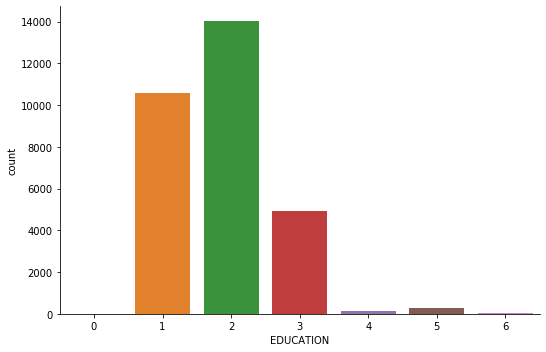

In [12]:
# Distribution of the cliets by Education
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels()

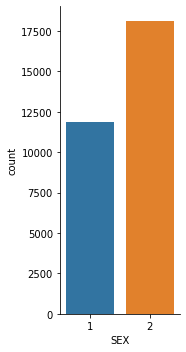

In [13]:
#Distribution of the clients by gender
sns.catplot('SEX', data=credit, kind='count', aspect=0.5)

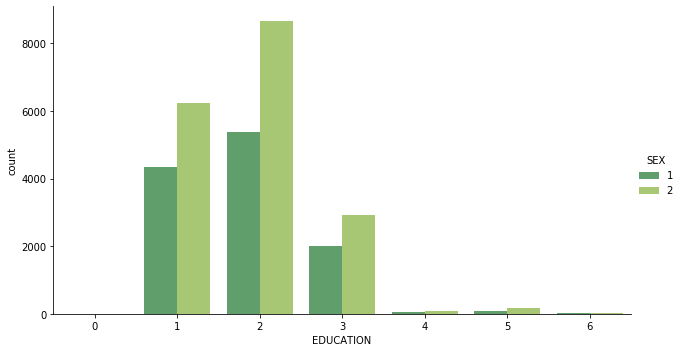

In [14]:
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75, palette='summer')
g.set_xlabels('EDUCATION')

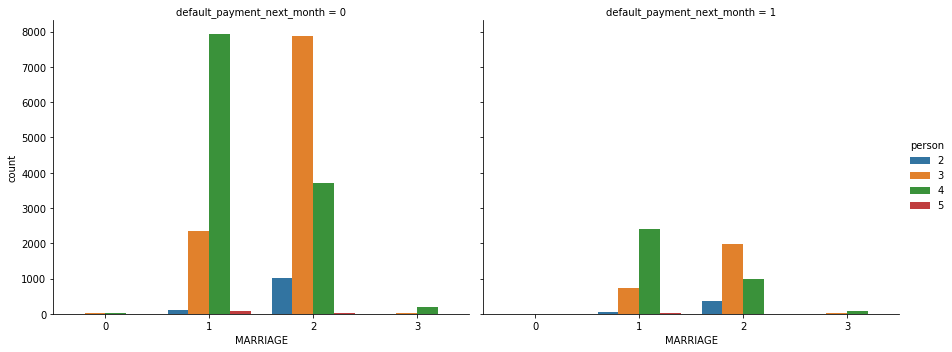

In [15]:
sns.catplot('MARRIAGE', data=credit, kind='count', hue='person', col='default_payment_next_month', aspect=1.25, height=5)#,
              #hue_order=["Youth","Youth Adults", "Adults", "Seniors"])

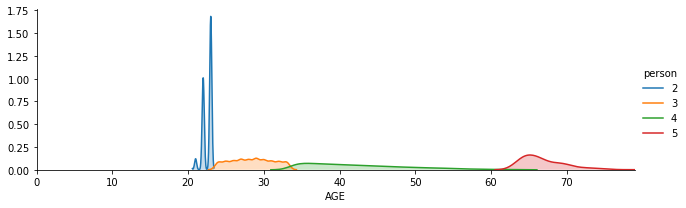

In [16]:
fig = sns.FacetGrid(credit, hue='person', aspect=3)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

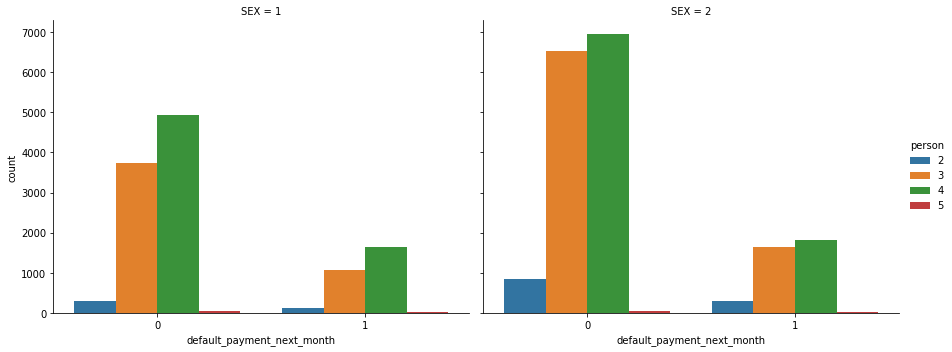

In [17]:
sns.catplot('default_payment_next_month', data=credit, kind='count', hue='person', col='SEX', aspect=1.25, 
               height=5)#, hue_order=["Youth","Youth Adults", "Adults", "Seniors"])#, palette='Greens_d')

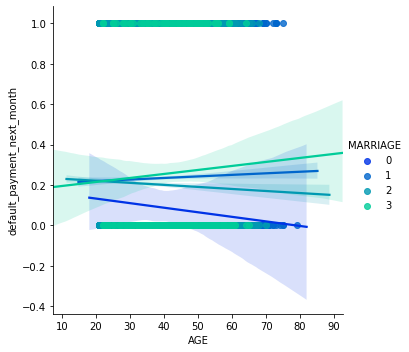

In [18]:
sns.lmplot('AGE', 'default_payment_next_month', hue='MARRIAGE', data=credit, palette='winter')#, hue_order=range(1,4))

# 4 Feature Engineering 

 Inn Feature Engineering we can use (either PCA or RFE) and Dimensionality Reduction, but for this work feature PCA is been used

## 4.1 Feature Selection

### 4.1.1 All features

In [20]:
#features
features = credit.iloc[:,12:24]
#Deleting age
features = credit.drop(columns = ['AGE'])
print('This are all the feature we have')
credit.head()

This are all the feature we have


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,person
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,3
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,3
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,4
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,4
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,4


### 4.1.2 Feacture ATM 

In [21]:
#features
features_AMT = features.iloc[:,10:22]
print('Selecting the amout of bill statment')
features_AMT.head()

Selecting the amout of bill statment


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


### 4.1.3 Rest of the features

In [22]:
#features
features_noAMT = features.iloc[:,1:9]
features_noAMT=pd.concat([features_noAMT,features['person']], axis = 1)
print('This is the rest of the features')
features_noAMT.head()

This is the rest of the features


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,person
0,2,2,1,2,2,-1,-1,-2,3
1,2,2,2,-1,2,0,0,0,3
2,2,2,2,0,0,0,0,0,4
3,2,2,1,0,0,0,0,0,4
4,1,2,1,-1,0,-1,0,0,4


## 4.2 PCA

Now we decide to use a PCA that has minimum 90% the the variance 

In [23]:
# Make an instance of the Model
pca = PCA(.95)

#Fit
pca.fit(features_AMT)

#Transform
features_AMT = pca.transform(features_AMT)

In [24]:
features_AMT_df = pd.DataFrame(features_AMT, columns=['PC0','PC1','PC2','PC3','PC4'])
features_AMT_df.head()


,PC0,PC1,PC2,PC3,PC4
0,-107827.409966,-3025.439711,-2537.615934,-5200.241638,753.913654
1,-104308.440916,2234.471987,-2169.571005,-5041.338555,-176.868674
2,-69249.080182,-3943.555618,-6142.775843,721.904414,1293.421049
3,-15282.889849,-12499.864895,2093.716319,-7442.442119,6520.041355
4,-65854.717174,22834.675392,32156.249549,62.822480,7334.363250


In this case we have 5 principal componenents that represent the 95% of the variance 

In [25]:
#The idea now is to have 1 dataset with all the features
features_PCA = pd.concat([features_noAMT,features_AMT_df], axis = 1)
features_PCA.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,person,PC0,PC1,PC2,PC3,PC4
0,2,2,1,2,2,-1,-1,-2,3,-107827.409966,-3025.439711,-2537.615934,-5200.241638,753.913654
1,2,2,2,-1,2,0,0,0,3,-104308.440916,2234.471987,-2169.571005,-5041.338555,-176.868674
2,2,2,2,0,0,0,0,0,4,-69249.080182,-3943.555618,-6142.775843,721.904414,1293.421049
3,2,2,1,0,0,0,0,0,4,-15282.889849,-12499.864895,2093.716319,-7442.442119,6520.041355
4,1,2,1,-1,0,-1,0,0,4,-65854.717174,22834.675392,32156.249549,62.822480,7334.363250


In [26]:
features_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
person       30000 non-null object
PC0          30000 non-null float64
PC1          30000 non-null float64
PC2          30000 non-null float64
PC3          30000 non-null float64
PC4          30000 non-null float64
dtypes: float64(5), object(9)
memory usage: 3.2+ MB


# 5 Creating the datasets

In [27]:
# First is taking the dependent variable
depVar = credit['default_payment_next_month']
depVar=depVar.astype('category')

Base on the feature selection that has been done in the previous section, the next step is to create the data set.
For this specify data set is diviced in 2 sections, 1 with all the independent vairalbes and the other one with the depedent.



## 5.1 Cross validation

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_PCA, depVar, test_size = 0.25, random_state=0)
X_train.shape, X_test.shape

((22500, 14), (7500, 14))

In [29]:
#Apling Standar scaling to the data set
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


# OneHotEncoder

In [30]:
features_PCA.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,person,PC0,PC1,PC2,PC3,PC4
0,2,2,1,2,2,-1,-1,-2,3,-107827.409966,-3025.439711,-2537.615934,-5200.241638,753.913654
1,2,2,2,-1,2,0,0,0,3,-104308.440916,2234.471987,-2169.571005,-5041.338555,-176.868674
2,2,2,2,0,0,0,0,0,4,-69249.080182,-3943.555618,-6142.775843,721.904414,1293.421049
3,2,2,1,0,0,0,0,0,4,-15282.889849,-12499.864895,2093.716319,-7442.442119,6520.041355
4,1,2,1,-1,0,-1,0,0,4,-65854.717174,22834.675392,32156.249549,62.822480,7334.363250


In [31]:
enc = OneHotEncoder(handle_unknown='ignore')

In [32]:
features_PCA_OnoeHotEncoder=enc.fit(features_PCA)

In [33]:
features_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
person       30000 non-null object
PC0          30000 non-null float64
PC1          30000 non-null float64
PC2          30000 non-null float64
PC3          30000 non-null float64
PC4          30000 non-null float64
dtypes: float64(5), object(9)
memory usage: 3.2+ MB


# 6 Classification Models & Tunning

In this section we use different clasifications modelts, we evaluate and the tunning of each to them be able to evaluate each on them and chose the one with the best performance.

## 6.1 Random Forest

In [34]:
#Model Tunnig
modelRF = RandomForestClassifier(n_estimators=200, n_jobs=10)

In [35]:
#Randon Forest Classifier
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## 6.2 Support Vector Machine

In [36]:
#Model Tunnig
modelSVM = SVC(kernel='rbf', gamma='scale')

In [37]:
#Support Vector Machine Classifier (SVM)
modelSVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 6.3 K-Nearest Neighbors

In [38]:
#Model Tunnig
modelKNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [39]:
#K-Nearest Neighbors (KNN)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

## 6.4 Neural Network

In [40]:
## 6.4 Neural Network
modelMLPC=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
modelMLPC.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11, 11, 11), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# 7 Model Tuning

# 8 Model Evaluation

## 8.1 cross_val_score

Evaluate a score by cross-validation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [41]:
#Random Forest model
print(cross_val_score(modelRF, X_train, y_train)) 

[0.8152     0.80933333 0.81466667]


In [42]:
#Support Vector Machine 
print(cross_val_score(modelSVM, X_train, y_train)) 

[0.8236     0.81706667 0.81506667]


In [43]:
#KNN
print(cross_val_score(modelKNN, X_train, y_train)) 

[0.8088     0.8048     0.80506667]


In [44]:
# Neural network
print(cross_val_score(modelMLPC, X_train, y_train)) 

[0.8164     0.80853333 0.81293333]


## 8.2 Model Score

We use the .score to evaluate waht is the best model

In [45]:
#Random Forest model
modelRF.score(X_train,y_train)

0.9919555555555556

In [46]:
#Support Vector Machine 
modelSVM.score(X_train,y_train)

0.8247555555555556

In [47]:
#KNN
modelKNN.score(X_train,y_train)

0.8276444444444444

In [48]:
# Neural network
modelMLPC.score(X_train,y_train)

0.8223111111111111

## 8.3 Model Predictions

In [49]:
predictionsRF = modelRF.predict(X_test)

In [50]:
predictionsSVM = modelSVM.predict(X_test)

In [51]:
predictionsKNN = modelKNN.predict(X_test)

In [52]:
predictionsMLPC = modelMLPC.predict(X_test)

## 8.4 Model Evalution

### 8.4.1 Model Evaluation for RF

In [53]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsRF))

Confusion Matrix
[[5574  294]
 [1046  586]]


In [54]:
print("Classification Report")
print(classification_report(y_test, predictionsRF))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5868
           1       0.67      0.36      0.47      1632

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [55]:
print("Accuracy")
print(accuracy_score(y_test, predictionsRF))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsRF)) 

Accuracy
0.8213333333333334
Kappa
0.37060361931100816


### 8.4.2 Model Evaluation for SVM

In [56]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsSVM))

Confusion Matrix
[[5609  259]
 [1060  572]]


In [57]:
print("Classification Report")
print(classification_report(y_test, predictionsSVM))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5868
           1       0.69      0.35      0.46      1632

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.81      0.82      0.80      7500



In [58]:
print("Accuracy")
print(accuracy_score(y_test, predictionsSVM))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsSVM)) 

Accuracy
0.8241333333333334
Kappa
0.3723079195609982


### 8.4.3 Model Evaluation for KNN

In [59]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsKNN))

Confusion Matrix
[[5552  316]
 [1139  493]]


In [60]:
print("Classification Report")
print(classification_report(y_test, predictionsKNN))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5868
           1       0.61      0.30      0.40      1632

    accuracy                           0.81      7500
   macro avg       0.72      0.62      0.64      7500
weighted avg       0.78      0.81      0.78      7500



In [61]:
print("Accuracy")
print(accuracy_score(y_test, predictionsKNN))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsKNN)) 

Accuracy
0.806
Kappa
0.30346888770252545


### 8.4.4 Model Evaluation for Neural Network MLPC 

In [62]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsMLPC))

Confusion Matrix
[[5526  342]
 [1004  628]]


In [63]:
print("Classification Report")
print(classification_report(y_test, predictionsMLPC))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5868
           1       0.65      0.38      0.48      1632

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.80      0.82      0.80      7500



In [64]:
print("Accuracy")
print(accuracy_score(y_test, predictionsMLPC))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsMLPC)) 

Accuracy
0.8205333333333333
Kappa
0.3825280201994995


# 9 Feature Importance

In [65]:
importancesRF = modelRF.feature_importances_
indices = np.argsort(importancesRF)[::-1]
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_],
             axis=0)

In [70]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], 
    features_PCA.columns[indices[f]], importancesRF[indices[f]]))

Feature ranking:
1. feature 12: PC3 (0.130639)
2. feature 9: PC0 (0.130092)
3. feature 11: PC2 (0.125509)
4. feature 10: PC1 (0.125037)
5. feature 13: PC4 (0.124194)
6. feature 3: PAY_0 (0.107633)
7. feature 4: PAY_2 (0.058067)
8. feature 5: PAY_3 (0.036787)
9. feature 1: EDUCATION (0.032759)
10. feature 7: PAY_5 (0.032209)
11. feature 6: PAY_4 (0.029493)
12. feature 8: person (0.027164)
13. feature 2: MARRIAGE (0.021675)
14. feature 0: SEX (0.018742)


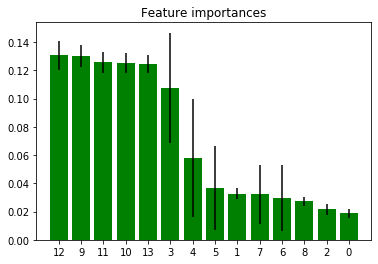

In [69]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importancesRF[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()